In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
train_df_16 = pd.read_csv('../data/raw/train_2016_v2.csv', parse_dates=['transactiondate'])
train_df_17 = pd.read_csv('../data/raw/train_2017.csv', parse_dates=['transactiondate'])
properties_16 = pd.read_csv('../data/raw/properties_2016.csv')
properties_17 = pd.read_csv('../data/raw/properties_2017.csv')


C:\Users\conor\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\conor\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
print(train_df_16.columns)
print(train_df_17.columns)
print(len(properties_16.columns))
print(len(properties_17.columns))

Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')
Index(['parcelid', 'logerror', 'transactiondate'], dtype='object')
58
58


In [76]:
#Merge 16 and 17 df's
train_df = pd.concat([train_df_16,train_df_17])
props_df = pd.concat([properties_16, properties_17])
train_df = pd.merge(train_df, props_df, on='parcelid', how='left')

## Investigate the train datasets

In [12]:
train_df.head()

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,8.0,...,NaN,NaN,218000.0,545000.0,2016.0,327000.0,6735.88,NaN,NaN,6.037107e+13
2,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
3,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,974900.0,2016.0,628442.0,10153.02,NaN,NaN,NaN
4,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13


In [13]:
len(train_df)

335776

### check dtypes

In [18]:
train_df.dtypes

parcelid                                 int64
logerror                               float64
transactiondate                 datetime64[ns]
airconditioningtypeid                  float64
architecturalstyletypeid               float64
basementsqft                           float64
bathroomcnt                            float64
bedroomcnt                             float64
buildingclasstypeid                    float64
buildingqualitytypeid                  float64
calculatedbathnbr                      float64
decktypeid                             float64
finishedfloor1squarefeet               float64
calculatedfinishedsquarefeet           float64
finishedsquarefeet12                   float64
finishedsquarefeet13                   float64
finishedsquarefeet15                   float64
finishedsquarefeet50                   float64
finishedsquarefeet6                    float64
fips                                   float64
fireplacecnt                           float64
fullbathcnt  

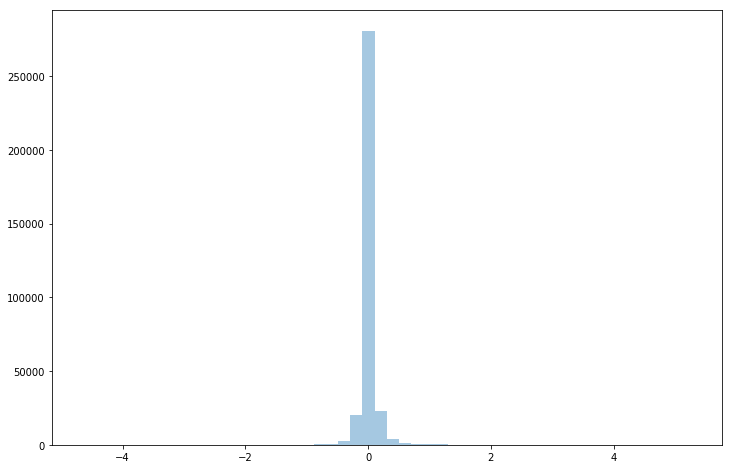

In [69]:
#Lets look at distribution of logerror

plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, kde=False)
plt.show()

### There are obviously some outliers, so lets remove them

In [70]:
ulimit = np.percentile(train_df.logerror, 99)
llimit = np.percentile(train_df.logerror, 1)

train_df['logerror'].loc[train_df['logerror']>ulimit] = ulimit
train_df['logerror'].loc[train_df['logerror']<llimit] = llimit

C:\Users\conor\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


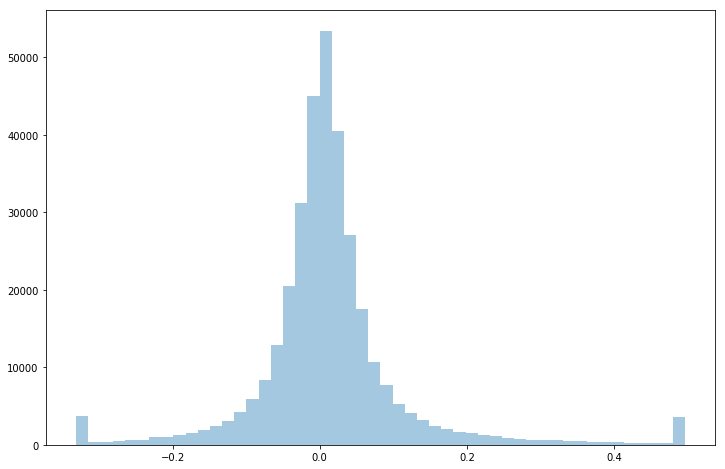

In [71]:
plt.figure(figsize=(12,8))
sns.distplot(train_df.logerror.values, kde=False)
plt.show()

In [19]:
missing_df = train_df.isnull().sum().sort_values(ascending=False).reset_index()
missing_df.columns = ['col_name','count_nulls']
missing_df['null_rate'] = missing_df['count_nulls']/train_df.shape[0]
missing_df

,col_name,count_nulls,null_rate
0,buildingclasstypeid,335713,0.999812
1,finishedsquarefeet13,335626,0.999553
2,storytypeid,335590,0.999446
3,basementsqft,335590,0.999446
4,yardbuildingsqft26,335446,0.999017
5,architecturalstyletypeid,334840,0.997212
6,typeconstructiontypeid,334732,0.996891
7,finishedsquarefeet6,334172,0.995223
8,decktypeid,333228,0.992412
9,taxdelinquencyyear,326410,0.972106


### Lets see if we can fill in some of the missing values

In [20]:
missing_df.sort_values('null_rate',ascending=False)

,col_name,count_nulls,null_rate
0,buildingclasstypeid,335713,0.999812
1,finishedsquarefeet13,335626,0.999553
2,storytypeid,335590,0.999446
3,basementsqft,335590,0.999446
4,yardbuildingsqft26,335446,0.999017
5,architecturalstyletypeid,334840,0.997212
6,typeconstructiontypeid,334732,0.996891
7,finishedsquarefeet6,334172,0.995223
8,decktypeid,333228,0.992412
9,taxdelinquencyyear,326410,0.972106


### Start with the pools and hot tubs fields

- 'poolcnt'	 Number of pools on the lot (if any)
- 'poolsizesum'	 Total square footage of all pools on property
- 'pooltypeid10'	 Spa or Hot Tub
- 'pooltypeid2'	 Pool with Spa/Hot Tub
- 'pooltypeid7'	 Pool without hot tub
- 'hashottuborspa'	 Does the home have a hot tub or spa


In [77]:
#NAN means no pool so lets change that to 0
train_df.poolcnt.fillna(0, inplace=True)

#NaN means no pool, so 0
train_df.pooltypeid10.fillna(0, inplace=True)

train_df.pooltypeid2.fillna(0, inplace=True)

train_df.pooltypeid7.fillna(0, inplace=True)

train_df.hashottuborspa.fillna(0, inplace=True)

#convert 'True' to 1
train_df.hashottuborspa.replace(to_replace=True, value=1, inplace=True)

In [78]:
#there are house with poolcnt == 1 but NaN poolsize sum - set poolsizesum to median in these cases
#train_df.loc[train_df['poolcnt'] == 1 & train_df["poolsizesum"].isnull(),['poolcnt','poolsizesum']]
train_df.loc[train_df.poolcnt==1, 'poolsizesum'] = train_df.loc[train_df.poolcnt==1,'poolsizesum']\
                                                    .fillna(train_df[train_df.poolcnt==1].poolsizesum.median())
    
train_df.loc[train_df.poolcnt==0, 'poolsizesum'] = 0

### Fireplace Data

- 'fireplacecnt'	 Number of fireplaces in a home (if any)
- 'fireplaceflag'	 Is a fireplace present in this home 

There are cases where fireplacecnt is 1 and flag is NaN, where fireplaceflag is True and fireplacecnt
is NaN.
- When fireplacecnt is 1 and fireplaceflag is NaN, set flag to True
- When fireplaceflag is True and fireplacecnt is NaN, set cnt to 1


In [79]:
#fireplacecnt = 1 and flag is NUll the set flag to True (which will be 1)
train_df.loc[(train_df.fireplacecnt>0) & (train_df.fireplaceflag.isnull()),'fireplaceflag'] = 1 


In [80]:
#flag is True and cnt is NaN, then cnt == 1
train_df.loc[(train_df.fireplaceflag==True) & (train_df.fireplacecnt.isnull()),'fireplacecnt'] = 1


In [81]:
#Remaining flag NaNs to 0
train_df.fireplaceflag.fillna(0, inplace=True)


In [82]:
#Set flag = True to 1
train_df.fireplaceflag.replace(to_replace=True, value=1, inplace=True)

#Remainingcnt NaNs to 0
train_df.fireplacecnt.fillna(0, inplace=True)

## Garages

- 'garagecarcnt'	 Total number of garages on the lot including an attached garage
- 'garagetotalsqft'	 Total number of square feet of all garages on lot including an attached garage

When garagecarcnt is NaN, we can assume that means 0
When garagetotalsqft is NaN, we can assume that means 0 also

In [83]:

train_df.garagecarcnt.unique()

train_df.garagetotalsqft.unique()

train_df.loc[(train_df.garagetotalsqft.isnull())&(train_df.garagecarcnt>=1)]

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock


In [84]:
train_df.garagecarcnt.fillna(0, inplace=True)
train_df.garagetotalsqft.fillna(0, inplace=True)

## Taxes

- 'taxvaluedollarcnt'	The total tax assessed value of the parcel
- 'structuretaxvaluedollarcnt'	The assessed value of the built structure on the parcel
- 'landtaxvaluedollarcnt'	The assessed value of the land area of the parcel
- 'taxamount'	The total property tax assessed for that assessment year
- 'assessmentyear'	The year of the property tax assessment 
- 'taxdelinquencyflag'	Property taxes for this parcel are past due as of 2015
- 'taxdelinquencyyear'	Year for which the unpaid propert taxes were due 

When taxdelinquencyflag is NaN, set to 0.  
When taxdelinquencyyear is NaN, set to 0.  
taxvaluedollarcnt = landtaxvaluedollarcnt + structuretaxvaluedollarcnt 

When one of landtax and structuretax is NaN and the other is not, their value is equal to taxvaluedollarcnt.  
So set the NaN to 0

There are 178 instances where taxvauecollarcnt is NaN, for now I will use the median but this could be improved. Same  
goes for instances where both landtaxvaluedollarcnt and structuretaxvaluedollarcnt are both NaN. Could get the median ratio  
and then multiply that by taxvaluedollarcnt

In [95]:
train_df.taxdelinquencyflag.fillna(0, inplace=True)

train_df.loc[train_df.taxvaluedollarcnt.notnull() & train_df.landtaxvaluedollarcnt.notnull() &
             train_df.structuretaxvaluedollarcnt.isnull(), 'structuretaxvaluedollarcnt'] = 0

train_df.loc[train_df.taxvaluedollarcnt.notnull() & train_df.landtaxvaluedollarcnt.isnull() &
             train_df.structuretaxvaluedollarcnt.notnull(), 'landtaxvaluedollarcnt'] = 0


In [117]:
drop_cols = list(missing_df.loc[missing_df.null_rate >= 0.98,'col_name'].values)

In [118]:
drop_cols

['buildingclasstypeid',
 'finishedsquarefeet13',
 'storytypeid',
 'basementsqft',
 'yardbuildingsqft26',
 'architecturalstyletypeid',
 'typeconstructiontypeid',
 'finishedsquarefeet6',
 'decktypeid']

In [2]:
x = [1,2,3]
y = x
x[0] = 4
print(x)
print(y)

[4, 2, 3]
[4, 2, 3]
